# PENAMBANGAN DATA

Pada materi ini akan membahas mengenai dataset iris mulai dari cara mengambil data dan memahami data. Selain itu kita juga akan melakukan pre-processing data yaitu identifikasi missing value dan imputasi missing value menggunakan metode mean dan KNN. setelah tidak ada missing value pre-processing dilanjut dengan mendeteksi apakah dalam data iris terdapat outlier atau tidak dengan menggunakan metode LOF (local outlier factor).

Setelah tahap pre-processing selesai. Kita juga akan membuat sebuah model dimana akan digunakan untuk mendeteksi suatu data iris baru termasuk kedalam kelas apa, dengan inputan sepalLength, sepalWidth, petalLength, dan petalWidth dan akan menghasilkan outputan Species dari antara kelas Iris-setosa, Iris-virginica, dan Iris-versicolor. Untuk modelling yang digunakan akan menggunakan metode Gaussian Naive Bayes (GNB).

# Menyiapkan tools

Pada tahap ini akan dilakukan beberapa pembuatan akun dan penginstallan dari tools yang akan digunakan untuk melakukan pendambangan data.

## Tools yang akan digunakan

1. Aiven : dapat diakses melalui web aiven.io, digunakan untuk menyimpan database dari dataset secara online
2. Deepnote : dapat diakses melalui web deepnote.com, digunakan untuk menulis proses dari pengolahan/analisis dataset secara online
3. HeidiSQL : berbasis desktop (perlu diinstall), digunakan sebagai DBMS dikarenakan aiven hanya menyediakan tempat penyimpanan data saja tidak terintegrasi dengan DBMS bawaannya sendiri.

## membuat akun dan service database di Aiven

1. kunjungi website https://aiven.io/
2. lakukan sign up (membuat akun baru)
3. setelah membuat akun, silahkan login mengunakan akun tersebut
4. setelah login, klik menu "create service" untuk membuat layanan database
5. pilih MySQL dan PostgreSQL sebagai database servicenya

## membuat akun di deepnote

1. kunjungi website https://deepnote.com/ 
2. buat akun pada website tersbut

## menginstall HeidiSQL

1. kunjung website https://www.heidisql.com/download.php
2. download installer HeidiSQL-nya
3. setelah selesai download, jalankan installer yg berformat exe
4. klik next untuk semua opsi

# Mengempulkan data

Pada tahap ini akan dijelaskan cara dari mendapatkan data iris serta cara memasukkannya ke dalam database SQL 

## Mendapatkan dataset iris

1. Untuk mendapatkan dataset anda hanya perlu searching dengan kata kunci iris dataset, atau bisa langsung mengunjungi tautuan berikut : https://www.kaggle.com/datasets/uciml/iris 
2. download dataset tersebut
3. setelah download selesai, ekstrak archive.zip (file yg sdh didownload)
4. setelah diekstrak, maka terdapat file "iris.csv". file tersebut nantinya akan dimasukkan ke database MySQL dan PostgreSQL.

## Membuat database dan integrasinya dengan DBMS (heidiSQL)

1. buat database terlebih dahulu pada postgreSQL dan MySQL di Aiven, untuk namanya saya gunakan 
    - MySQL : datasetSepal
    - PostgreSQL : datasetPetal
2. koneksikan kedua database tersebut ke dalam heidiSQL dengan mencocokan host, port, user, dan password (bisa dilihat aiven bagian overview)


## Integrasi database dengan deepnote

1. pada bagian integrations, terdapat tanda "+" untuk menambahkan integrasi ke database. fungsinya sama seperti heidiSQL, namun perbedaanya heidiSQL ada GUI-nya, sedangkan deepnote tidak ada.
2. setelah mengklik tanda "+" pilih MySQL dan PostgreSQL.
3. kemudian cocokan  host, port, user, dan password (bisa dilihat aiven bagian overview).

## Memasukkan Iris Dataset kedalam database

### Mengkonversi CSV ke SQL

Untuk bisa memasukkan iris dataset diperlukan konversi terlebih dahulu ke SQL. Berikut ini caranya :
1. kunjungi web https://tableconvert.com/csv-to-sql
2. load file iris dataset berformat csv yang telah kita download ke web tersebut
3. Setelah itu akan muncul script sql dari csv tersebut <img src="img/csv2sql.png">
5. edit Table Name sesuai dengan isi datanya.
6. edit Quotes dengan MySQL / PostgreSQL sesuai dengan data tersebut akan di-insert pada database jenis apa
7. tambahkan PRIMARY KEY setelah INT pada Id 

### Memasukkan data ke MySQL dan Postgree

Setelah menkonversi csv to sql. salin block script tersebut ke dalam database MySQL dan PostgreSQL yang telah kita buat sebelumnya.
Untuk penamaanan tablenya sebagai berikut :
1. MySQL : irisSepal
2. PostgreSQL : irisPetal

## Memisahkan data Sepal dan Petal

Pada bagin ini kami akan membagi dataset kedalam 2 bagian.
1. data SepalLengthCm dan SepalWidthCm akan dimasukkan kedalam database MySQL
2. data PetalLengthCm, PetalWidthCm, dan Species akan dimasukkan kedalam database PostgreSQL

untuk keda Database akan memiliki Id sebagai primary key dan sebagai penghubung dari kedua database tersebut.

Note : karena sebelumnya ketika create table dan insert table tidak kita pisahkan. maka cara memisahkan data tersebut adalah dengan menggunakan Alter table dan melakukan drop pada kolom.

### MySQL (Data Sepal)

In [ ]:
df_4 = _deepnote_execute_sql('ALTER TABLE "irisSepal"\nDROP COLUMN "PetalLengthCm",\nDROP COLUMN "PetalWidthCm",\nDROP COLUMN "Species";', 'SQL_9F077E84_7AEF_47B3_8C40_E916DA5FA711', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_4

### PostgreSQL (Data Petal dan Species)

In [ ]:
df_2 = _deepnote_execute_sql('ALTER TABLE "irisPetal"\nDROP COLUMN "SepalLengthCm",\nDROP COLUMN "SepalWidthCm";', 'SQL_AF5A66FF_047C_49FE_AC4E_A96E5E1F3346', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

## Membuat missing value (disengaja untuk latihan)

### menghapus value SepalLengthCm

In [ ]:
df_3 = _deepnote_execute_sql('UPDATE irisSepal\nSET SepalLengthCm = null\nWHERE Id IN (1, 24, 51, 73, 126);', 'SQL_9F077E84_7AEF_47B3_8C40_E916DA5FA711', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_3

# Menampilkan data

## Menyatukan data dari MySQL dan PostgreSQL 

Install mysql connector & psyopg (postgre connector)

In [ ]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 47.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install psycopg2-binary


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


koneksi ke database

In [ ]:
import pandas as pd
import mysql.connector
import psycopg2

# koneksi ke database MySQL
sql_connection = mysql.connector.connect(
    host="datamining-mysql-glendy22076.a.aivencloud.com",
    user="avnadmin",
    password="AVNS_1beB1sJH_nq2H4TMEz4",
    port = "10332",
    database="datasetSepal"
)

# koneksi ke database Postgre
postgres_connection = psycopg2.connect(
    host="dataminingpostgre-glendy22076.a.aivencloud.com",
    database="datasetPetal",
    user="avnadmin",
    port="10332",
    password="AVNS_T1lSnpyZmY7WO7jin9F"
)

# Membaca data dari database menggunakan Pandas

# mengambil data dari irisSepal 
sql_query = "SELECT * FROM irisSepal"
data_sql = pd.read_sql(sql_query, sql_connection)

# mengambil data dari irisPetal
postgres_query = 'SELECT * FROM "irisPetal"'
data_postgres = pd.read_sql(postgres_query, postgres_connection)

# mengambil data dari oriIris (original table tanpa missing value)
oriQuery = "SELECT * FROM oriIris"
oriData = pd.read_sql(oriQuery, sql_connection)

oriData.describe()

/tmp/ipykernel_34/98144446.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_sql = pd.read_sql(sql_query, sql_connection)
/tmp/ipykernel_34/98144446.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_postgres = pd.read_sql(postgres_query, postgres_connection)
/tmp/ipykernel_34/98144446.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  oriData = pd.read_sql(oriQuery, sql_connection)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Menampilkan data

### tanpa missing value (original)

In [ ]:
df_18 = _deepnote_execute_sql('SELECT * FROM oriIris', 'SQL_9F077E84_7AEF_47B3_8C40_E916DA5FA711', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_18

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Dengan missing value

In [ ]:
df_5 = _deepnote_execute_sql('SELECT sepal.Id,SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species\nFROM data_sql AS sepal\nINNER JOIN data_postgres AS petal ON sepal.Id = petal.Id', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_5

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,NaN,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,104,6.3,2.9,5.6,1.8,Iris-virginica
146,115,5.8,2.8,5.1,2.4,Iris-virginica
147,142,6.9,3.1,5.1,2.3,Iris-virginica
148,143,5.8,2.7,5.1,1.9,Iris-virginica


# Memahami data

## Apa itu Iris-datasets ?

<b>Dataset Iris</b> adalah salah satu dataset paling terkenal dalam ilmu data dan pembelajaran mesin. Dataset ini pertama kali diperkenalkan oleh ahli biologi Sir Ronald Fisher pada tahun 1936 sebagai contoh dalam analisis diskriminan linear. Ini terdiri dari data pengukuran dari tiga spesies iris (Iris setosa, Iris versicolor, dan Iris virginica). Setiap spesies diambil dari pulau Gugusan Kepulauan Guernsey dan Pantai Pasifik Amerika Serikat. Dataset ini sering digunakan untuk demonstrasi dalam klasifikasi dan clustering karena sifatnya yang relatif sederhana dan dapat dengan mudah dimengerti.

<b>Data understanding</b> (pemahaman data) adalah tahap awal dalam proses analisis data yang bertujuan untuk menggali wawasan tentang struktur, karakteristik, dan kualitas dataset yang akan digunakan.

## Struktur iris-datasets

Iris-dataset memiliki 150 baris dan 6 kolom, untuk detil dari setiap kolom adalah sebagai berikut :
- Id = int(64)
- SepalLengthCm = float(64)
- SepalWidthCm = float(64)
- PetalLengthCm = float(64)
- PetalWidthCm = float(64)
- Species = object

Untuk mengetahui jumlah record yang terdapat pada dataset dapat dilakukan perintah berikut :

In [ ]:
oriData.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Penjelasan dataset iris

Berikut adalah penjelasan mengenai kolom / atribut yang berada dalam Iris Dataset :
- Id : Identifier unik untuk setiap baris, setiap baris akan memiliki Id yang berbeda-beda yang membantu Anda mengidentifikasi dan merujuk kembali ke record / entri tertentu dalam dataset. Tipe data yang digunakan dalam kolom Id adalah Integer.
- SepalLengthCm : Menandakan panjang dari kelopak bunga Iris dalam satuan Cm, tipe data yang digunakan dalam kolom ini adalah Float.
- SepalWidthCm : Menandakan lebar dari kelopak bunga Iris dalam satuan Cm, tipe data yang digunakan dalam kolom ini adalah Float.
- PetalLengthCm : Menandakan panjang dari mahkota bunga Iris dalam satuan Cm, tipe data yang digunakan dalam kolom ini adalah Float.
- PetalWidthCm : Menandakan lebar dari mahkota bunga Iris dalam satuan Cm, tipe data yang digunakan dalam kolom ini adalah Float.
- Species : Menandakan species dari bunga Iris, dalam dataset ini terdapat 3 species : Iris setosa, Iris versicolor, dan Iris virginica. Tipe data yang digunakan dalam kolom ini adalah object

Penjelasan mengenai Fitur dan Label :
- Fitur adalah atribut atau variabel independen yang digunakan untuk membuat prediksi atau menjelaskan hasil. Dalam analisis data atau pembelajaran mesin, fitur-fitur ini digunakan sebagai input untuk membangun model atau melakukan prediksi.
- Label adalah atribut atau variabel dependen yang ingin kita prediksi berdasarkan fitur-fitur yang ada. Ini adalah variabel yang ingin kita pelajari dari data. Saat melakukan pembelajaran mesin, tujuan utama adalah membangun model yang dapat memprediksi nilai dari kolom label berdasarkan fitur-fitur yang diberikan.

Fitur di dalam Iris Dataset :
- SepalLengthCm (Panjang Kelopak)
- SepalWidthCm (Lebar Kelopak)
- PetalLengthCm (Panjang Mahkota)
- PetalWidthCm (Lebar Mahkota)

Label yang ingin diprediksi adalah Spesies dari bunga iris. Spesies ini dapat memiliki tiga nilai yang berbeda :
- Iris-setosa
- Iris-versicolor
- Iris-virginica

## Iris Statistic Description 

In [ ]:
oriData.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Berikut ini akan dijelaskan lebih detil dari setiap baris yang dihasilkan oleh describe function:
- Count (Jumlah): Jumlah entri non-null dalam setiap kolom.
- Mean (Rata-rata): Rata-rata dari setiap kolom.
- Std (Standar Deviasi): Standar deviasi dari setiap kolom, mengukur seberapa tersebar data di sekitar rata-rata.
- Min (Minimum): Nilai minimum dalam setiap kolom.
- 25% (Kuartil Pertama): Nilai kuartil pertama (25th percentile) dari setiap kolom, menandakan nilai di bawahnya 25% dari data.
- 50% (Median): Nilai median (50th percentile) dari setiap kolom, membagi data menjadi dua bagian yang sama.
- 75% (Kuartil Ketiga): Nilai kuartil ketiga (75th percentile) dari setiap kolom, menandakan nilai di bawahnya 75% dari data.
- Max (Maksimum): Nilai maksimum dalam setiap kolom.

# Preprocessing Data

Data Preprocessing merupakan salah satu tahapan dalam melakukan mining data. Sebelum menuju ke tahap  pemprosesan. Data mentah akan diolah terlebih dahulu. Data Preprocessing atau praproses data biasanya dilakukan melalui cara eliminasi data yang tidak sesuai. Selain itu dalam proses ini data akan diubah dalam bentuk yang akan lebih dipahami oleh sistem.

## Mengidentifikasi missing values

In [ ]:
df_6 = _deepnote_execute_sql('SELECT sepal.Id,SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species\nFROM data_sql AS sepal\nINNER JOIN data_postgres AS petal ON sepal.Id = petal.Id\nWHERE SepalLengthCm IS NULL OR Species IS NULL;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_6

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,NaN,3.5,1.4,0.2,Iris-setosa
1,24,NaN,3.3,1.7,0.5,Iris-setosa
2,51,NaN,3.2,4.7,1.4,Iris-versicolor
3,73,NaN,2.5,4.9,1.5,Iris-versicolor
4,126,NaN,3.2,6.0,1.8,Iris-virginica


pada query diatas menampilkan missing value yang berjumlah 5 record pada kolom SepalLengthCm, dengan detil kelas sebagai berikut :
- 2 missing value SepalLengthCm pada Species Iris-sentosa
- 2 missing value SepalLengthCm pada Species Iris-versicolor
- 1 missing value SepalLengthCm pada Species Iris-virginica

## imputasi missing values

### imputasi dengan mean

Mean adalah nilai rata-rata yang dihitung dengan menjumlahkan semua nilai yang tersedia dan membaginya dengan jumlah observasi. Mengisi nilai yang hilang dengan mean adalah cara sederhana untuk memperkirakan nilai yang tidak diketahui berdasarkan data yang ada. 

Duplikasi dataset ke table baru untuk menyimpan hasil inputasi Mean 

untuk menyimpan hasil imputasi missing value dengan mean kita buat 2 table baru 1 di mysql dan 1 di postgre, untuk datanya sama yaitu iris-dataset.

memanggil table duplikasi untuk mean

In [ ]:
sql_query = "SELECT * FROM premin_mean_sepal"
dataSepal = pd.read_sql(sql_query, sql_connection)

postgre_query = 'SELECT * FROM "premin_mean_petal"'
dataPetal = pd.read_sql(postgre_query, postgres_connection)

/tmp/ipykernel_34/1314221840.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataSepal = pd.read_sql(sql_query, sql_connection)
/tmp/ipykernel_34/1314221840.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataPetal = pd.read_sql(postgre_query, postgres_connection)


Langkah imputasi mean

langkah imputasi dengan metode mean :
1. rata-rata SepalLengthCm sesuai dengan Species yang dicari
2. masukkan hasil rata-rata ke SepalLength yang terdapat missing value sesuai dengan Species yang SepalLength-nya dirata-rata

Imputasi untuk missing value di data SepalLength pada Species Iris-setosa

Kita hitung rata-rata SepalLength untuk species Iris-setosa.

In [ ]:
df_7 = _deepnote_execute_sql('SELECT AVG(SepalLengthCm)\nFROM data_sql AS sepal\nINNER JOIN data_postgres AS petal ON sepal.Id = petal.Id\nWHERE Species = \'Iris-setosa\' AND SepalLengthCm IS NOT NULL', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_7

,avg(SepalLengthCm)
0,5.004255


Setelah didapati rata-rata sepal length untuk species iris-setosa, kita cari data sepal length yang hilang pada species iris-setosa berada pada id ke berapa saja.

In [ ]:
df_11 = _deepnote_execute_sql('SELECT sepal.Id\nFROM data_sql AS sepal\nINNER JOIN data_postgres AS petal ON sepal.Id = petal.Id\nWHERE Species = \'Iris-setosa\' AND SepalLengthCm IS NULL', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_11

,Id
0,1
1,24


Setelah mendapat id yang terdapat missing value di sepal length-nya. Langkah selanjutnya adalah mengganti null (missing value) dengan data rata-rata.

In [ ]:
df_8 = _deepnote_execute_sql('UPDATE premin_mean_sepal\nSET SepalLengthCm = 5.004255319\nWHERE Id IN (1,24);', 'SQL_9F077E84_7AEF_47B3_8C40_E916DA5FA711', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_8

Lakukan cara yang sama untuk imputasi missing value pada species yang berbeda

Imputasi untuk missing value di data SepalLength pada Species Iris-versicolor

In [ ]:
df_9 = _deepnote_execute_sql('SELECT AVG(SepalLengthCm)\nFROM data_sql AS sepal\nINNER JOIN data_postgres AS petal ON sepal.Id = petal.Id\nWHERE Species = \'Iris-versicolor\' AND SepalLengthCm IS NOT NULL', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_9

,avg(SepalLengthCm)
0,5.906383


In [ ]:
df_12 = _deepnote_execute_sql('SELECT sepal.Id\nFROM data_sql AS sepal\nINNER JOIN data_postgres AS petal ON sepal.Id = petal.Id\nWHERE Species = \'Iris-versicolor\' AND SepalLengthCm IS NULL', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_12

,Id
0,51
1,73


In [ ]:
df_10 = _deepnote_execute_sql('UPDATE premin_mean_sepal\nSET SepalLengthCm = 5.906382979\nWHERE Id IN (51,73);', 'SQL_9F077E84_7AEF_47B3_8C40_E916DA5FA711', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_10

Imputasi untuk missing value di data SepalLength pada Species Iris-versicolor

In [ ]:
df_13 = _deepnote_execute_sql('SELECT AVG(SepalLengthCm)\nFROM data_sql AS sepal\nINNER JOIN data_postgres AS petal ON sepal.Id = petal.Id\nWHERE Species = \'Iris-virginica\' AND SepalLengthCm IS NOT NULL', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_13

,avg(SepalLengthCm)
0,6.57551


In [ ]:
df_14 = _deepnote_execute_sql('SELECT sepal.Id\nFROM data_sql AS sepal\nINNER JOIN data_postgres AS petal ON sepal.Id = petal.Id\nWHERE Species = \'Iris-virginica\' AND SepalLengthCm IS NULL', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_14

,Id
0,126


In [ ]:
df_15 = _deepnote_execute_sql('UPDATE premin_mean_sepal\nSET SepalLengthCm = 6.575510204\nWHERE Id=126;', 'SQL_9F077E84_7AEF_47B3_8C40_E916DA5FA711', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_15

Menampilkan hasil imputasi mean

Setelah semua missing value telah di isi. Berikutnya akan kita cek hasilnya dengan menampilkan semua datanya.
Dapat dilihat di bawah ini tidak ada warna merah yang menandakan bahwa semua missing value telah diisi.

In [ ]:
df_16 = _deepnote_execute_sql('SELECT sepal.Id,SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species\nFROM dataSepal AS sepal\nINNER JOIN dataPetal AS petal ON sepal.Id = petal.Id', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_16

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.004255,3.5,1.4,0.2,Iris-setosa
1,2,4.900000,3.0,1.4,0.2,Iris-setosa
2,3,4.700000,3.2,1.3,0.2,Iris-setosa
3,4,4.600000,3.1,1.5,0.2,Iris-setosa
4,5,5.000000,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,104,6.300000,2.9,5.6,1.8,Iris-virginica
146,115,5.800000,2.8,5.1,2.4,Iris-virginica
147,142,6.900000,3.1,5.1,2.3,Iris-virginica
148,143,5.800000,2.7,5.1,1.9,Iris-virginica


### imputasi dengan KNN

K-Nearest Neighbor (KNN) adalah suatu metode yang menggunakan algoritma supervised dimana hasil dari query instance yang baru diklasifikan berdasarkan mayoritas dari kategori pada KNN. Tujuan dari algoritma KNN adalah untuk mengklasifikasi objek baru berdasarkan atribut dan training samples. Dimana hasil dari sampel uji yang baru diklasifikasikan berdasarkan mayoritas dari kategori pada KNN.

<b>Kelebihan Algoritma KNN</b>
- Algoritma KNN dapat mengatasi data noisy
- Algoritma KNN dapat menanggulangi data yang jumlahnya besar
- Mudah diimplementasikan

<b>Kekurangan Algoritma KNN</b>
- KNN perlu menentukan nilai dari parameter K (jumlah dari tetangga terdekat)
- Pembelajaran berdasarkan jarak tidak jelas mengenai jenis jarak apa yang harus digunakan dan atribut mana yang harus digunakan untuk mendapatkan hasil yang terbaik
- Daya komputasi cukup tinggi karena diperlukan perhitungan jarak dari tiap sample uji pada keseluruhan sample latih

<b>Langkah-langkah Algoritma KNN</b>
1. Tentukan jumlah tetangga (K) yang akan digunakan untuk pertimbangan penentuan kelas.
2. Hitung jarak dari data baru ke masing-masing data point di dataset.
3. Ambil sejumlah K data dengan jarak terdekat, kemudian tentukan kelas dari data baru tersebut.

Untuk mencari dekat atau jauhnya jarak antar titik pada kelas k biasanya dihitung menggunakan jarak Euclidean. Jarak Euclidean adalah formula untuk mencari jarak antara 2 titik dalam ruang dua dimensi. Berikut rumus untuk menghitung jarak Euclidean:

<img src="img/euclidien.png">

Untuk data yang terdapat missing value yang akan di imputasi akan disamakan id-nya seperti di metode mean. Hal ini diperuntukkan supaya dapat melihat perbandingan antara metode mean dan KNN. Berikut akan ditampilkan kembali missing value yang terdapat pada database.

In [ ]:
df_17 = _deepnote_execute_sql('SELECT sepal.Id,SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species\nFROM data_sql AS sepal\nINNER JOIN data_postgres AS petal ON sepal.Id = petal.Id\nWHERE SepalLengthCm IS NULL OR Species IS NULL;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_17

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,NaN,3.5,1.4,0.2,Iris-setosa
1,24,NaN,3.3,1.7,0.5,Iris-setosa
2,51,NaN,3.2,4.7,1.4,Iris-versicolor
3,73,NaN,2.5,4.9,1.5,Iris-versicolor
4,126,NaN,3.2,6.0,1.8,Iris-virginica


Langkah awal untuk algorima KNN adalah menentukan banyak tetangga (K) yang optimal untuk digunakan dalam model tersebut

/tmp/ipykernel_34/2223207867.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataset = pd.read_sql(query, conn)
Accuracy of our model is equal 100.0 %.


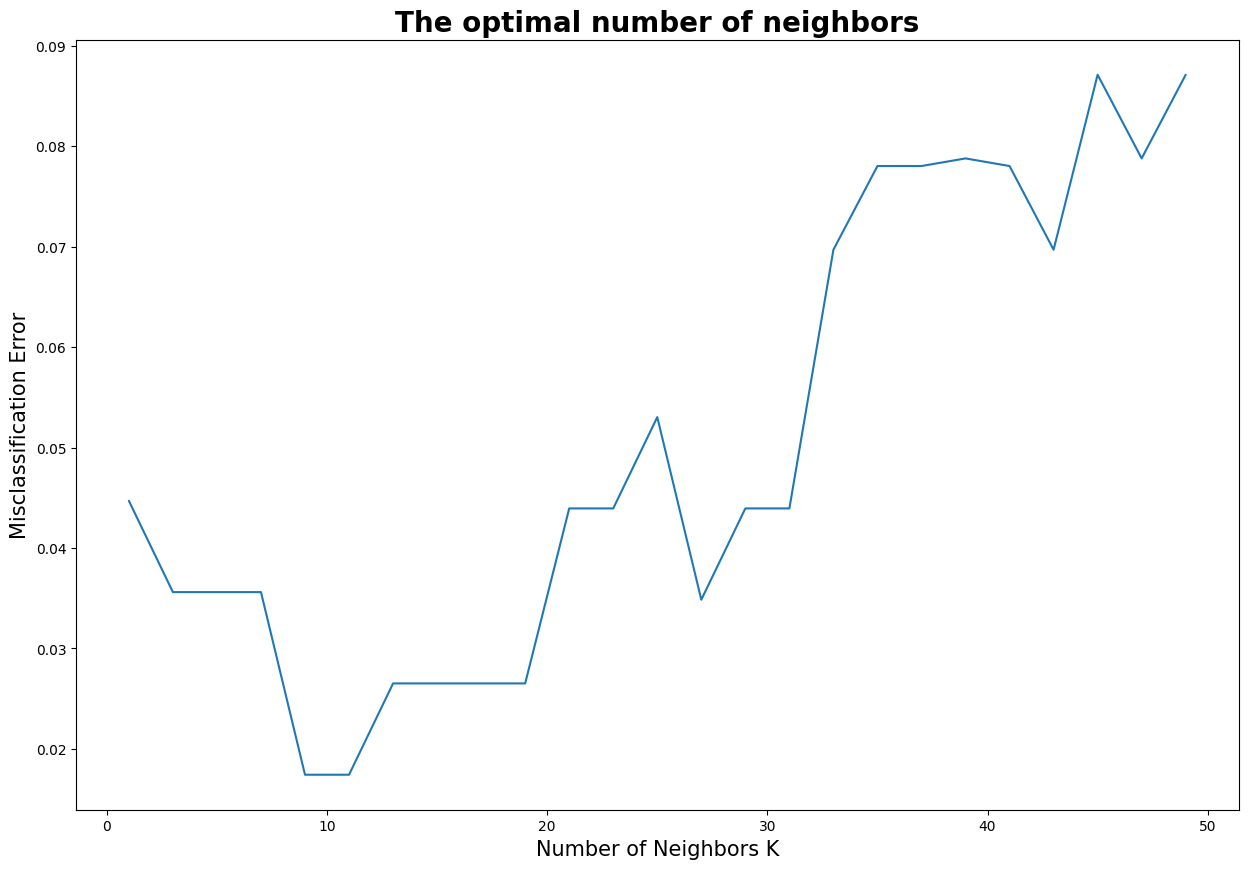

The optimal number of neighbors is 9.


In [ ]:
import mysql.connector
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Informasi koneksi ke database MySQL
hostname = "datamining-mysql-glendy22076.a.aivencloud.com"
port = 10332
username = 'avnadmin'
password = "AVNS_1beB1sJH_nq2H4TMEz4"
database = 'datasetSepal'

# Membuat koneksi ke database MySQL
conn = mysql.connector.connect(
    host=hostname,
    port=port,
    user=username,
    password=password,
    database=database
)

# mengambil semua data sepalLength yang bukan missing value
query = "SELECT * FROM premin_knn WHERE SepalLengthCm IS NOT NULL"
dataset = pd.read_sql(query, conn)

# Menutup koneksi ke database
conn.close()

# Memisahkan fitur dan label
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

# Mengubah label menjadi numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat model KNN dengan k=5
classifier = KNeighborsClassifier(n_neighbors=5)

# Melatih model
classifier.fit(X_train, y_train)

# Memprediksi data uji
y_pred = classifier.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

# Membuat list k untuk KNN
k_list = list(range(1, 50, 2))
cv_scores = []

# Melakukan 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Menghitung MSE
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(15, 10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

# Menemukan nilai k terbaik
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

Dari hasil code diatas didapatkan bahwa nilai optimal <b>banyaknya tetangga</b> adalah <b>9</b>. Selanjutnya kita lakukan imputasi terhadap data yang memiliki missing values.

In [ ]:
# !pip install mysql-connector-python  # untuk install module mysql connector, uncomment untuk install
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import mysql.connector

# Informasi koneksi ke database MySQL
hostname = "datamining-mysql-glendy22076.a.aivencloud.com"
port = 10332
username = 'avnadmin'
password = "AVNS_1beB1sJH_nq2H4TMEz4"
database = 'datasetSepal'

# Membuat koneksi ke database MySQL
conn = mysql.connector.connect(
    host=hostname,
    port=port,
    user=username,
    password=password,
    database=database
)

# Membaca data dari database menggunakan Pandas
query = "SELECT * FROM premin_knn"
df = pd.read_sql(query, conn)

# Menyimpan DataFrame asli
df_orig = df.copy()

# Menutup koneksi ke database
conn.close()

# Menghapus kolom 'Id' dan 'Species'
df = df.drop(['Id', 'Species'], axis=1)

# Mengecek apakah ada nilai yang hilang (NA/null) dalam DataFrame
missing_values = df.isna().any()
print("")
print("APAKAH ADA YANG MISSING VALUES".center(50))
print(missing_values)

sum_of_misssing_values = df.isna().sum()
print("")
print("JUMLAH YANG MISSING VALUES".center(50))
print(sum_of_misssing_values)

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("")
print("NORMALIZE".center(50))
print(df_normalized.head())

print("")
print("SEBELUM IMPUTASI".center(50))
# Menyimpan indeks baris yang memiliki nilai yang hilang sebelum imputasi
indeks_missing_sebelum_imputasi = df_orig[df_orig.isnull().any(axis=1)].index.tolist()

baris_missing = df[df.isnull().any(axis=1)]
print(baris_missing)

imputer = KNNImputer(n_neighbors=9)
df_imputed = pd.DataFrame(imputer.fit_transform(df_normalized),columns = df.columns)

# Mengembalikan nilai-nilai yang dinormalisasi ke dalam skala aslinya
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df.columns)

print("")
print("HASIL IMPUTASI".center(50))
baris_missing_imputasi = df_imputed.loc[indeks_missing_sebelum_imputasi]
print(baris_missing_imputasi)

print("")
print("APAKAH ADA YANG MISSING VALUES".center(50))
print(df_imputed.isna().any())

print("")
print("JUMLAH YANG MISSING VALUES".center(50))
print(df_imputed.isna().sum())

/tmp/ipykernel_34/3970984587.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)

          APAKAH ADA YANG MISSING VALUES          
SepalLengthCm     True
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
dtype: bool

            JUMLAH YANG MISSING VALUES            
SepalLengthCm    5
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

                    NORMALIZE                     
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            NaN      0.625000       0.067797      0.041667
1       0.166667      0.416667       0.067797      0.041667
2       0.111111      0.500000       0.050847      0.041667
3       0.083333      0.458333       0.084746      0.041667
4       0.194444      0.666667       0.067797      0.041667

                 SEBE

Setelah didapati jawaban diatas mengenai hasil inputasi. langkah selanjutnya adalah memasukkannya kedalam database dikarenakan hasil imputasi di atas belum merubah ke databasenya.

In [ ]:
# Menggabungkan kolom 'Id' dan 'Species' ke DataFrame yang telah diimputasi
df_imputed['Id'] = df_orig['Id']
df_imputed['Species'] = df_orig['Species']

# Membuka kembali koneksi ke database MySQL
conn = mysql.connector.connect(
    host=hostname,
    port=port,
    user=username,
    password=password,
    database=database
)

# Mengubah data di database MySQL
cursor = conn.cursor()
for index, row in df_imputed.iterrows():
    id = row['Id']
    sepal_length = row['SepalLengthCm']
    sepal_width = row['SepalWidthCm']
    petal_length = row['PetalLengthCm']
    petal_width = row['PetalWidthCm']
    species = row['Species']
    
    cursor.execute("UPDATE premin_knn SET SepalLengthCm=%s, SepalWidthCm=%s, PetalLengthCm=%s, PetalWidthCm=%s, Species=%s WHERE Id=%s", 
                   (sepal_length, sepal_width, petal_length, petal_width, species, id))

# Melakukan commit perubahan
conn.commit()

# Menutup koneksi
conn.close()

In [ ]:
df_18 = _deepnote_execute_sql('SELECT * FROM premin_knn\nWHERE SepalLengthCm is null;', 'SQL_9F077E84_7AEF_47B3_8C40_E916DA5FA711', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_18

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


Setelah dilakukan imputasi dan memasukkan ke databasenya maka sudah tidak ada lagi missing value. 

### Perbandingan akurasi antara mean dan KNN

Untuk mendapatkan akurasi kita gunakan library sklearn.metric dengan menginport accuracy_score

Hasil akurasi model dari Mean

In [ ]:
import pandas as pd
import mysql.connector
import psycopg2

# koneksi ke database MySQL
sql_connection = mysql.connector.connect(
    host="datamining-mysql-glendy22076.a.aivencloud.com",
    user="avnadmin",
    password="AVNS_1beB1sJH_nq2H4TMEz4",
    port = "10332",
    database="datasetSepal"
)

# Membaca data dari database menggunakan Pandas
sql_query = "SELECT * FROM premin_mean"
mean_result = pd.read_sql(sql_query, sql_connection)


/tmp/ipykernel_34/2295021245.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mean_result = pd.read_sql(sql_query, sql_connection)


In [ ]:
df_23 = _deepnote_execute_sql('SELECT * FROM mean_result;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_23

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.004255,3.5,1.4,0.2,Iris-setosa
1,2,4.900000,3.0,1.4,0.2,Iris-setosa
2,3,4.700000,3.2,1.3,0.2,Iris-setosa
3,4,4.600000,3.1,1.5,0.2,Iris-setosa
4,5,5.000000,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.700000,3.0,5.2,2.3,Iris-virginica
146,147,6.300000,2.5,5.0,1.9,Iris-virginica
147,148,6.500000,3.0,5.2,2.0,Iris-virginica
148,149,6.200000,3.4,5.4,2.3,Iris-virginica


Dari output di atas, kita dapat mengidentifikasi kolom yang tidak penting pada dataset yaitu kolom "Id". Untuk menghilangkan kolom tersebut, gunakan fungsi drop().

In [ ]:
mean_result.drop('Id',axis=1,inplace=True)

Sebelum melatih model kita perlu memisahkan atribut dengan label. Selain itu, kita juga perlu membagi dataset menjadi data latih dan data uji. 

In [ ]:
# memisahkan atribut dan label
X = mean_result[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = mean_result['Species']
 
# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Selanjutnya, definisikan model decision tree yang akan kita gunakan. Kemudian,  latih model menggunakan data latih menggunakan fungsi fit()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
 
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
 
# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

Setelah model dilatih, uji model menggunakan data uji untuk melihat seberapa baik model yang telah kita buat. Pengujian model ini bisa dilakukan dengan menggunakan fungsi predict(). 

Berikutnya, gunakan metrik akurasi untuk melihat seberapa baik model yang telah kita latih.

In [ ]:
# Evaluasi Model
from sklearn.metrics import accuracy_score
 
y_pred = tree_model.predict(X_test)
 
acc_secore = round(accuracy_score(y_pred, y_test), 3)
 
print('Accuracy: ', acc_secore)

Accuracy:  0.967


Hasil akurasi model dengan KNN

untuk caranya sama dengan model mean, jadi saya tidak akan menjelaskan uang secara detil pada pengecekan akurasi model di KNN

In [ ]:
import pandas as pd
import mysql.connector
import psycopg2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# koneksi ke database MySQL
sql_connection = mysql.connector.connect(
    host="datamining-mysql-glendy22076.a.aivencloud.com",
    user="avnadmin",
    password="AVNS_1beB1sJH_nq2H4TMEz4",
    port = "10332",
    database="datasetSepal"
)

# Membaca data dari database menggunakan Pandas
sql_query = "SELECT * FROM premin_knn"
knn_result = pd.read_sql(sql_query, sql_connection)

knn_result.drop('Id',axis=1,inplace=True)

# memisahkan atribut dan label
X = knn_result[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = knn_result['Species']
 
# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
 
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
 
# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

# Evaluasi Model
 
y_pred = tree_model.predict(X_test)
 
acc_secore = round(accuracy_score(y_pred, y_test), 3)
 
print('Accuracy: ', acc_secore)

/tmp/ipykernel_34/3831632010.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  knn_result = pd.read_sql(sql_query, sql_connection)
Accuracy:  0.933


Kesimpulan akurasi

Hasil dari akurasi adalah sebagai berikut :
- metode mean : mendapat skor akurasi 0,967. dengan perbandingan data train 80% sedangkan data test 20%
- metode knn : mendapat skor akurasi 0,933. dengan perbandingan data train 90% sedangan data test 10%

dari hasil keduanya sama-sama baik, hal ini dikarenakan jika hasil pengujian memiliki nilai dari 0.85 sampai 0.99, maka model tersebut dapat dikatakan baik.

## Mendeteksi outlier (local outlier factor)

### Konsep local outlier factor

Outlier adalah titik data yang berbeda atau jauh dari titik data lainnya. Local Outlier Factor (LOF) adalah algoritma yang mengidentifikasi outlier yang ada dalam kumpulan data. Ketika suatu titik dianggap sebagai outlier berdasarkan lingkungan lokalnya, maka titik tersebut disebut local outlier . LOF akan mengidentifikasi outlier dengan mempertimbangkan kepadatan lingkungan. LOF bekerja dengan baik ketika kepadatan data tidak sama di seluruh kumpulan data.

Untuk memahami LOF, kita harus mempelajari beberapa konsep secara berurutan:
- K-distance dan K-neighbors
- Reachability Distance (RD)
- Local Reachability Density (LRD)
- Local Outlier Factor (LOF)

Berikut akan dijelaskan lebih detil dari kempat konsep tersebut :

K-distance dan K-neighbors

K-distance adalah jarak antara suatu titik, dan merupakan tetangga terdekat Kᵗʰ. Tetangga K yang dilambangkan dengan Nₖ(A) mencakup himpunan titik yang terletak di dalam atau pada lingkaran berjari-jari jarak K. K-tetangga bisa lebih dari atau sama dengan nilai K. Kita akan melihat contohnya. Katakanlah kita mempunyai empat titik A, B, C, dan D.                                                                                                     Jika K=2, K-tetangga A adalah C, B, dan D. Di sini, nilai K=2 tetapi ||N₂(A)|| = 3. Oleh karena itu, ||Nₖ(titik)|| akan selalu lebih besar atau sama dengan K.

<img src="img/k-distance.png" width="" align="" />

Reachability distance (RD)

<img src="img/rd_formula.png" width="" align="" />

<img src="img/rd_graphic.png" width="" align="" />

Ini didefinisikan sebagai jarak K maksimum Xj dan jarak antara Xi dan Xj. Ukuran jarak bersifat khusus untuk masalah (Euclidean, Manhattan, dll.)

Local reachability density (LRD)

<img src="img/lrd_formula.png" width="" align="" />

LRD merupakan kebalikan dari rata-rata jarak jangkauan A dari tetangganya. Semakin besar jarak jangkauan rata-rata (yaitu, tetangga jauh dari titik tersebut), semakin sedikit kepadatan titik yang ada di sekitar titik tertentu. Ini menunjukkan seberapa jauh suatu titik dari kelompok titik terdekat. Nilai LRD yang rendah menunjukkan bahwa cluster terdekat berada jauh dari titik

Local Outlier Factor (LOF)

<img src="img/lof_formula.png" width="" align="" />

LRD tiap titik digunakan untuk membandingkan dengan rata-rata LRD K tetangganya. LOF adalah perbandingan rata-rata LRD K tetangga A terhadap LRD A.

Jika suatu titik bukan merupakan pencilan (inlier), rasio rata-rata LRD tetangganya kira-kira sama dengan LRD suatu titik (karena kepadatan suatu titik dan tetangganya kira-kira sama). Dalam hal ini, LOF hampir sama dengan 1. Sebaliknya, jika suatu titik merupakan outlier, LRD suatu titik lebih kecil dari rata-rata LRD tetangganya. Maka nilai LOF akan tinggi.

Umumnya jika LOF > 1 maka dianggap outlier, namun hal tersebut tidak selalu benar. Katakanlah kita mengetahui bahwa kita hanya memiliki satu outlier dalam data, lalu kita ambil nilai LOF maksimum di antara semua nilai LOF, dan titik yang sesuai dengan nilai LOF maksimum akan dianggap sebagai outlier.

### Menghitung manual local outlier factor

Buat data dengan tipe numerik 3 fitur jumlah data 10, k=3, p=2 (eulidian distance)

Berikut langkah-langkah mendeteksi outlier dengan metode LOF :
1. Menghitung jarak dan menentukan tetangga
2. Menghitung Reachability Distance (RD)
3. Menghitung Local Reachability Distance (LRD)
4. Menghitung Local Outlier Factor (LOF)

Mari kita tentukan data yang akan kita gunakan untuk melakukan perhitungan manual. Contoh data memiliki 3 fitur yaitu X, Y, Z yang masing masing bertipe data numeric, dan berjumlah 10. 

<img src="img/data.png" width="" align="" />

1. Menghitung jarak dan menentukan tetangga

Selanjutnya untuk menghitung jarak, kita menggunakan Euclidean Distance. Untuk rumusnya yaitu :

<img src="img/euclidien.png" width="" align="" />

Selanjutnya mari kita hitung jaraknya dan menentukan nilai K (banyak tetangga) yang akan kita gunakan. Mari gunakan nilai K = 3, lalu kita identifikasi jarak tetangga ke-3 dari masing-masing data.

<img src="img/k.png" width="" align="" />

2. Menghitung Reachability Distance (RD)

Selanjutnya kita hitung nilai Reachability Distance dari masing-masing objek. Tapi sebelum itu kita harus menentukan berapa banyak objek yang masuk ke dalam ruang lingkup tetangga ke-n dari suatu objek. Secara matematis bisa dituliskan seperti di bawah ini :

k-distance neighborhood of o, Nk(o) = {o’| o’ in D, dist(o, o’) ≤ distk(o)}

Yang dimana nilai dari Nk(o) akan lebih besar atau sama dengan nilai K

Untuk contohnya pada objek a memiliki nilai jarak tetangga ke-3 yaitu 2,236068 berarti objek lain yang masuk ke dalam lingkupnya yaitu yang nilainya kurang atau sama dengan 2,236068 yang berarti berisikan {b, d, g}. Mari kita lakukan untuk objek yang lain.

<img src="img/nk.png" width="" align="" />

Selanjutnya hitung Reachability Distance dari maring-masing objek, untuk rumusnya yaitu :

<img src="img/rd_formula2.png" width="" align="" />

Sebagai contoh objek a, objek a memiliki 3 tetangga terdekat yaitu {b, d, g} kita lakukan perhitungan terhadap masing-masing objek, dengan memilih nilai terbesar dari perbandingan jarak tetangga ke-3 dari objek dengan jarak objek ke objek lain:

reachdist3(b<-a) = max{dist3(b), dist(b,a)}

reachdist3(b<-a) = max(1,414213562, 1,414213562)

reachdist3(b<-a) =1,414213562

Mari kita lakukan untuk keseluruhan objek

<img src="img/rd1.png" width="" align="" />

<img src="img/rd2.png" width="" align="" />

3. Menghitung Local Reachability Distance (LRD)

Selanjutnya melakukan perhitungan Local Reachability Distance (LRD), LRD dirumuskan seperti di bawah ini :

<img src="img/lrd_formula2.png" width="" align="" />

Berdasarkan rumus diatas bisa dideskripsikan bahwa LRD merupakan hasil dari pembagian banyak jumlah tetangga ke-n dari suatu objek dibagi dengan total dari reachdistance ability objek tersebut.

Sehinga jika dilakukan perhitungan untuk setiap objek didapatkan hasil

<img src="img/lrd2.png" width="" align="" />

<img src="img/lrd1.png" width="" align="" />

4. Menghitung Local Outlier Factor (LOF)

Selanjutnya yang terakhir yaitu menghitung Local Outlier Factor (LOF), dirumuskan sebagai berikut :

<img src="img/lof_formula2.png" width="" align="" />

Berdasarkan rumus diatas diketahui jika LOF didapat dari hasil perkalian jumlah nilai lrd suatu objek dikali dengan jumlah reachability distance suatu objek.

Sehinga jika dilakukan perhitungan untuk setiap objek didapatkan hasil

<img src="img/lof.png" width="" align="" />

Dari hasil diatas bisa ditemukan bahwa nilai lof h menyimpang dikarenakan perbedaan yang terlalu jauh dengan objek yang lain, sehingga bisa disimpulkan h adalah outlier

### Menghitung menggunakan python (scikit-learn)

Setelah menentukan outlier manual menggunakan excel, berikutnya kita akan menguji hasil tersebut menggunakan scikit-learn.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

X = [
    (1, 2, 0),
    (1, 1, 1),
    (1, 0, 2),
    (1, 1, 2),
    (1, 3, 4),
    (4, 0, 0),
    (0, 4, 0),
    (20, 20, 20),
    (4, 0, 1),
    (3, 1, 4),
]

lof = LocalOutlierFactor(n_neighbors=3, contamination=0.1)

y_pred = lof.fit_predict(X)

print("Predicted table:", y_pred)
print("Negative LOF scores:", -lof.negative_outlier_factor_)  # Ubah tanda negatif untuk mendapatkan nilai LOF positif

Predicted table: [ 1  1  1  1  1  1  1 -1  1  1]
Negative LOF scores: [0.98293009 1.08044926 0.92129394 0.92129394 1.3041007  1.31780729
 1.32168753 9.59896579 1.29253584 1.3041007 ]


pada hasil perhitungan menggunakan scikit-learn didapati bahwa terdapat outlier pada indeks ke-7 (list indeks dimulai dari 0) yang LOF-nya bernilai 9.59896579. Maka kesimpulannya sama dengan perhitungan manual yaitu terdapat outlier pada data g atau kalau dalam list indeks ke-7.

### Implementasi pada data iris

untuk latihan kita tambahkan beberapa outlier pada iris dataset, disini saya membuat table baru bernama "outlier_data".

In [ ]:
df_19 = _deepnote_execute_sql('UPDATE outlier_data\nSET SepalLengthCm = 18\nWHERE Id IN (8, 10, 44)', 'SQL_9F077E84_7AEF_47B3_8C40_E916DA5FA711', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_19

In [ ]:
df_20 = _deepnote_execute_sql('UPDATE outlier_data\nSET SepalWidthCm = 18\nWHERE Id IN (12, 99, 120)', 'SQL_9F077E84_7AEF_47B3_8C40_E916DA5FA711', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_20

Setelah kita mengubah data menjadi outlier, kita cek apakah data sudah berubah atau belum 

In [ ]:
df_21 = _deepnote_execute_sql('SELECT * FROM outlier_data\nWHERE Id IN (8, 10, 44, 12, 99, 120)', 'SQL_9F077E84_7AEF_47B3_8C40_E916DA5FA711', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_21

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,8,18.0,3.4,1.5,0.2,Iris-setosa
1,10,18.0,3.1,1.5,0.1,Iris-setosa
2,12,4.8,18.0,1.6,0.2,Iris-setosa
3,44,18.0,3.5,1.6,0.6,Iris-setosa
4,99,5.1,18.0,3.0,1.1,Iris-versicolor
5,120,6.0,18.0,5.0,1.5,Iris-virginica


Setelah itu barulah kita mendeteksi outlier menggunakan Local Outlier Factor (LOF)


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Outlier at Id 12 has a rank of 1 with LOF score -26.593899916905738
Outlier at Id 99 has a rank of 2 with LOF score -26.579862470007615
Outlier at Id 120 has a rank of 3 with LOF score -24.26623086755851
Outlier at Id 44 has a rank of 4 with LOF score -14.024754322154397
Outlier at Id 8 has a rank of 5 with LOF score -14.021821334322073


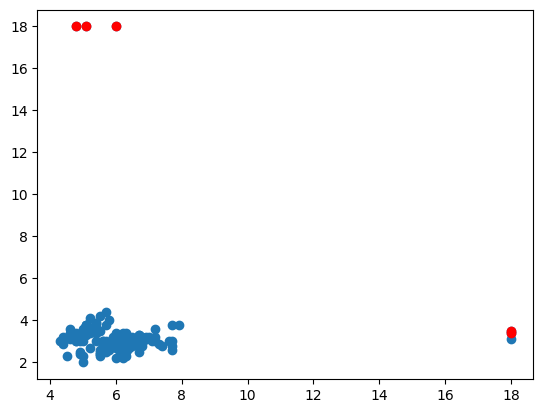

In [ ]:
!pip install mysql-connector-python
from sklearn.neighbors import LocalOutlierFactor
import mysql.connector
import matplotlib.pyplot as plt

# Informasi koneksi ke database MySQL
hostname = "datamining-mysql-glendy22076.a.aivencloud.com"
port = 10332
username = 'avnadmin'
password = "AVNS_1beB1sJH_nq2H4TMEz4"
database = 'datasetSepal'

# Membuat koneksi ke database MySQL
conn = mysql.connector.connect(
    host=hostname,
    port=port,
    user=username,
    password=password,
    database=database
)

# Membaca data dari database menggunakan Pandas
query = "SELECT SepalLengthCm, SepalWidthCm FROM outlier_data"
cursor = conn.cursor()
cursor.execute(query)
rows = cursor.fetchall()
x = [[row[0], row[1]] for row in rows]

# Menutup koneksi ke database
conn.close()

# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.03)

# Melakukan prediksi outlier
y_pred = lof.fit_predict(x)

# Menampilkan data dengan outlier yang diidentifikasi
outlier_indices = [i for i, label in enumerate(y_pred) if label == -1]
values = [x[i] for i in outlier_indices]

# Getting the outlier scores
outlier_scores = lof.negative_outlier_factor_

# Combining outlier indices and scores
outliers_with_scores = [(index, score) for index, score in zip(outlier_indices, outlier_scores[outlier_indices])]

# Sorting outliers based on their scores
sorted_outliers = sorted(outliers_with_scores, key=lambda x: x[1])

# Adding ranks to outliers
ranked_outliers = {index: rank for rank, (index, _) in enumerate(sorted_outliers, start=1)}

# Printing the ranks and LOF scores of outliers
for index, (rank, score) in enumerate(sorted_outliers, start=1):
    print(f"Outlier at Id {rank+1} has a rank of {index} with LOF score {score}")

plt.scatter([point[0] for point in x], [point[1] for point in x])
plt.scatter([point[0] for point in values], [point[1] for point in values], color='r')
plt.show()

Dari hasil tersebut kita tahu bahwa outlier berada pada Id sebagai berikut : 
1. Outlier at Id 12 has a rank of 1 with LOF score -26.593899916905738
2. Outlier at Id 99 has a rank of 2 with LOF score -26.579862470007615
3. Outlier at Id 120 has a rank of 3 with LOF score -24.26623086755851
4. Outlier at Id 44 has a rank of 4 with LOF score -14.024754322154397
5. Outlier at Id 8 has a rank of 5 with LOF score -14.021821334322073

Selain itu juga ditampilkan data grafik dalam bentuk scatter-plot diagram yang dimana outlier diidentikkan dengan warna merah. 

# Modelling

Pada tahap modelling akan dilakukan sebuah proses untuk membuat model machine learning yang bertujuan untuk memprediksi suatu data inputan baru termasuk ke dalam kelas/species mana. Pada tahap ini akan memecah data menjadi 2 bagian yaitu data train dan data test dan kemudian membuat model menggunakan metode Gaussian Naive Bayes.

## Metode Gaussian Naive Bayes

Gaussian Naive Bayes merupakan sebuah teknik klasifikasi yang digunakan dalam machine learning dengan menggunakan metode probability dan Distribusi Gaussian atau Distiribusi Normal. Gaussian Distribution mengasumsikan bahwa setiap feature pada data memiliki penngaruh yang independent dalam memprediksi target. Kombinasi prediksi dari seluruh parameter adalah prediksi akhir dengan probability dari target variable yang diklasifikasikan ke dalam dua kelas. Klasifikasi akhirnya adalah hasil probability yang lebih tinggi dari grup target maka itu adalah kelas dari suatu data.

<img src="img/general_gnb.png" width="" align="" />

### Implementasi dengan Sklearn

Untuk perhitungan secara manual menggunakan excel akan dibahas setelah kita mengimplementasi model gaussian naive bayes menggunakan library scikit learn milik python.

Untuk pembagiannya data train dan data test akan dibagi menjadi 20% data test dan 80% data train

In [ ]:
# install terlebih dahulu mysql-connector untuk menghubungkan ke database
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 73.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import mysql.connector
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# koneksi ke database MySQL
sql_connection = mysql.connector.connect(
    host="datamining-mysql-glendy22076.a.aivencloud.com",
    user="avnadmin",
    password="AVNS_1beB1sJH_nq2H4TMEz4",
    port = "10332",
    database="datasetSepal"
)

# Membaca data dari database menggunakan Pandas
sql_query = "SELECT * FROM oriIris"
data_iris = pd.read_sql(sql_query, sql_connection)

# Menghapus kolom Id, dikarenakan kurang relevan
data_iris.drop('Id',axis=1,inplace=True)

# memisahkan atribut dan label
X = data_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = data_iris['Species']
 
# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
 
# membuat model Gaussian naive bayes
gnb_model = GaussianNB()
 
# Melatih model dengan menggunakan data latih
gnb_model = gnb_model.fit(X_train, y_train)

# Evaluasi Model
y_pred = gnb_model.predict(X_test)
 
acc_secore = round(accuracy_score(y_pred, y_test), 3)
print('Accuracy: ', acc_secore)

/tmp/ipykernel_35/2873799767.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_iris = pd.read_sql(sql_query, sql_connection)
Accuracy:  0.967


disini kita mendapat akurasi model 0,967. akurasi ini dikatakan baik karena berada di atas 0,85

Setelah itu maka kita langsung akan memprediksi suatu data baru ke dalam model yang telah kita buat, untuk data yang akan kita inputkan adalah sebagai berikut :

- SepalLengthCm : 6
- SepalWidthCm : 3
- PetalLengthCm : 5
- PetalWidthCm : 2

In [ ]:
print(gnb_model.predict([[6, 3, 5, 2]]))

['Iris-virginica']
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Kesimpulan

Dari hasil tersebut data yang kita inputkan termasuk species Iris-virginica. Berikutnya kita akan buktikan apakah prediksi dari model tersebut sama dengan hasil perhitungan mannual menggunakan excel.

### Perhitungan manual dengan excel

Langkah-langkah dalam menghitung gaussian naive bayes :
1. Mengambil data train dari model yang telah kita buat
2. hitung probabilitas setiap data train
    <img src="img/prob_formula.png">
3. hitung mean dan standart devisiasi dari setiap fitur beserta setiap kelas pada data train
4. tentukan suatu inputan data sepalLength, sepalWidth, petalLength, petalWidth
5. hitung distribusi gausiaan setiap fitur beserta setiap kelas pada data train
    <img src="img/gnb_formula_detail.png">
6. hitung posteriori dari setiap kelas
    <img src="img/posteriori_formula.png">
7. tentukan maximum posteriori
8. pada kelas yg mendapat posteriori maksimal itulah kelas dari data inputan baru tersebut 

Setelah kita tahu langkah-langkah pengerjaan gaussian naive bayes, langsung saja kita langsung ke prakteknya menggunakan excel

1. Mengambil data train dari model yang telah kita buat

Untuk menyamakan hasil dari prediksi maka. pembagian data train dan data test harus ikut sama, demikian juga isi data didalamnya. Untuk caranya yaitu tinggal kita satukan data X_train (menampung fitur) dan y_train (menampung label)  kemudian kita satukan kedua data tersebut dan dikonversi menjadi csv.

In [ ]:
merged_df= pd.concat([X_train, y_train], axis=0)

merged_df.to_csv("gabungan", sep='\t')

Setelah kita rapihkan csv ke dalam excel maka didapai banyaknya data train dari masing-masing species sebagai berikut :
- Iris-Setosa = 37
- Iris-Versicolor = 44
- Iris-Virginica = 39

Total = 120

2. Menghitung probabilitas setiap data train

Dari rumus yang diberikan sebelumnya di langkah-langkah, akan dilakukan perhitungan probabilitas dari masing-masing kelas sesuai dengan jumlah data train pada kelas tersebut kemudian dibagi dengan banyaknya total data train

- P(a) : probabilitas
- n(a) : banyaknya record data train pada suatu kelas
- N : total banyaknya record data train

<img src="img/hasil_probabilitas.png" width="" align="" />

3. Menghitung mean dan standart devisiasi

hitunglah mean dan standart devisiasi dari masing-masing fitur pada setiap kelas di data train.

untuk rumus di excel sebagai berikut 
- mean : =AVERAGE()
- standart devisiasi : =STDEV.P()

<img src="img/mean_std.png" width="" align="" />

4. membuat inputan

Buat suatu data acak untuk inputan sepalLength, sepalWidth, petalLength, dan petalWidth. Nantinya data ini akan kita gunakan untuk menguji hasil dari perhitungan excel kita sehingga kita bisa tahu termasuk kelas apakah data dari inputan kita, apakah termasuk ke kelas setosa, versicolor, atau virginica.

untuk detil inputan sebagai berikut :
- SepalLengthCm : 6
- SepalWidthCm : 3
- PetalLengthCm : 5
- PetalWidthCm : 2

<img src="img/inputan.png" width="" align="" />

5. Menghitung distribusi gaussian

Setelah didapati mean dan standart devisiasi dari setiap fitur pada setiap kelas, dan juga sudah menentukan inputan. maka langkah selanjutnya adalah memasukkan ke dalam rumus distribusi gaussian.

berikut ini adalah rumusnya :

<img src="img/gnb_formula_detail.png" width="" align="" />

<img src="img/ket_distribusi_gaussian.png" width="" align="" />

setelah kita tahu rumusnya, maka sekarang kita dapat melakukan perhitungan di excel. Berikut ini adalah hasil dari perhitungannya :

<img src="img/hasil_distribusi_gauss.png" width="" align="" />

6. menghitung posteriori

Setelah didapat semua hasil dari distribusi gaussian, langkah selanjutnya adalah menentukan posteriori-nya. Berikut ini untuk rumusnya :

<img src="img/posteriori_formula.png" width="" align="" />

Dimana
- P(A|Hi) : hasil perkalian setiap fitur pada setiap kelas
- P(a) : probabilitas setiap kelas 

Contohnya kita akan menghitung posteriori dari kelas versicolor, maka caranya adalah sebagai berikut :
P(A|Hi) = 0,76 * 1,00 * 0,24 * 0,01
P(a) = 0,366667
posteriori = P(A|Hi) * P(a) = 0,000558371

Berikut ini hasil untuk perhitungan pada kelas lain :

<img src="img/hasil_posteriori.png" width="" align="" />

7. menentukan maximum posteriori

setelah didapati semua posteriori, langkah selanjutnya adalah menentukan nilai maximum dari posteriori-nya. dan didapati hasilnya sebagai berikut :

<img src="img/hasil_max_post.png" width="" align="" />

kelas virginica mendapatkan nilai posteriori tertinggi dengan nilai 0,094235270

8. Kesimpulan

Dari hasil perhitungan diatas dapat disimpulkan bahwa data dengan inputan sebagai berikut : 
- SepalLengthCm : 6
- SepalWidthCm : 3
- PetalLengthCm : 5
- PetalWidthCm : 2

adalah kelas <b>Iris-Virginica</b>, karena mendapat nilai posteriori tertinggi.

Dari hasil perhitungan manual dengan excel maka dapat disimpulkan bahwa baik model dan perhitungan sudah benar karena memberikan output prediksi yang sama.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=79495dc5-cec1-4211-98f1-18aff84df654' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>